<a href="https://colab.research.google.com/github/Narendrarc20/FUTURE_DS_03/blob/main/Feedback_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import random

# --- Create a Realistic Sample Dataset ---
events = ['Tech Conference 2025', 'Annual Cultural Fest', 'AI/ML Workshop', 'Career Fair', 'Alumni Meet']
types = ['Seminar', 'Cultural Fest', 'Workshop', 'Fair', 'Meetup']
departments = ['Computer Science', 'Mechanical Engineering', 'Arts & Humanities', 'Business School']
comments = {
    'positive': ["Great event!", "The speaker was fantastic.", "Well organized and very informative.", "Loved the food and networking.", "So much fun, can't wait for the next one."],
    'neutral': ["The event was okay.", "It met my expectations.", "The schedule was a bit too packed.", "Decent, but could be improved."],
    'negative': ["Poorly organized.", "The sessions were boring.", "The registration process was a mess.", "Not what I expected.", "The audio was terrible."]
}

data = []
for i in range(250):  # Create 250 feedback entries
    event_name = random.choice(events)
    event_type = types[events.index(event_name)]
    department = random.choice(departments)
    rating = random.randint(1, 5)

    if rating >= 4:
        comment = random.choice(comments['positive'])
    elif rating == 3:
        comment = random.choice(comments['neutral'])
    else:
        comment = random.choice(comments['negative'])

    data.append({
        'Event Name': event_name,
        'Event Type': event_type,
        'Department': department,
        'Rating (1-5)': rating,
        'Feedback Comment': comment
    })

# Create a DataFrame and save it to a CSV file
df_sample = pd.DataFrame(data)
df_sample.to_csv('college_event_feedback.csv', index=False)

print("Successfully created the sample file: 'college_event_feedback.csv'")

Successfully created the sample file: 'college_event_feedback.csv'


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set a nice style for our charts
sns.set_style("whitegrid")

# 1. Load the dataset
df = pd.read_csv('college_event_feedback.csv')

In [ ]:
# --- Find the Top Events by Satisfaction ---

# 2. Group data by event name and calculate the average rating
top_events = df.groupby('Event Name')['Rating (1-5)'].mean().sort_values(ascending=False)

print("--- Average Satisfaction Score Per Event ---")
print(top_events)

--- Average Satisfaction Score Per Event ---
Event Name
AI/ML Workshop          3.311111
Tech Conference 2025    3.038462
Alumni Meet             2.941176
Career Fair             2.920000
Annual Cultural Fest    2.846154
Name: Rating (1-5), dtype: float64


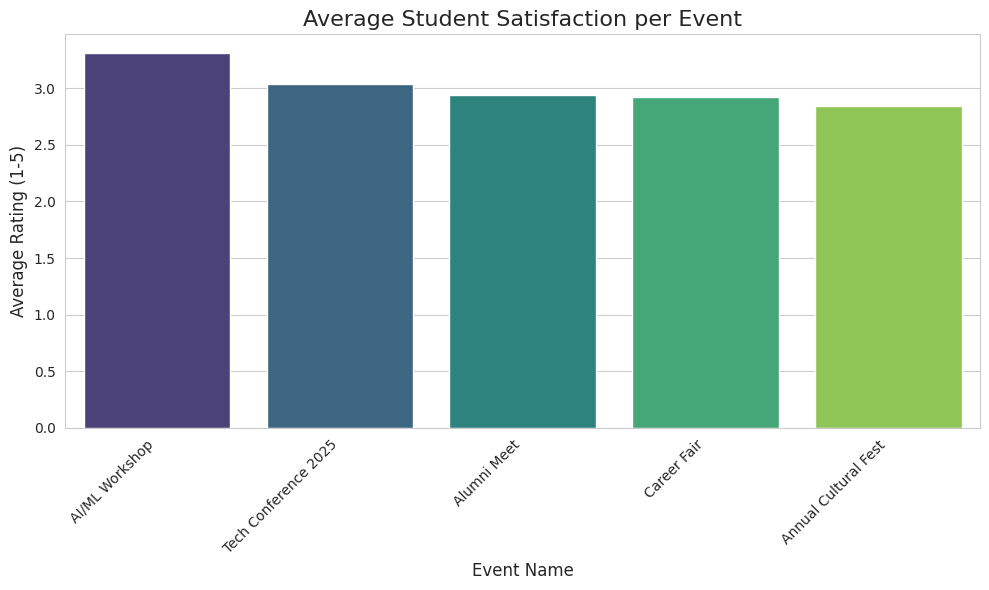

In [13]:
# 3. Visualize the average ratings with the updated code
plt.figure(figsize=(10, 6))
# This line has been updated to follow the new standard and remove the warning
sns.barplot(x=top_events.index, y=top_events.values, palette='viridis', hue=top_events.index, legend=False)
plt.title('Average Student Satisfaction per Event', fontsize=16)
plt.xlabel('Event Name', fontsize=12)
plt.ylabel('Average Rating (1-5)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# TextBlob is a library for processing textual data.
from textblob import TextBlob

# --- Perform Sentiment Analysis ---

# This function classifies the sentiment based on a polarity score
# Polarity is a float from -1.0 (very negative) to +1.0 (very positive)
def get_sentiment(comment):
    analysis = TextBlob(comment)
    if analysis.sentiment.polarity > 0.1:
        return 'Positive'
    elif analysis.sentiment.polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

# Apply this function to the 'Feedback Comment' column to create a new 'Sentiment' column
df['Sentiment'] = df['Feedback Comment'].apply(get_sentiment)

print("--- First 5 Rows with Sentiment Analysis ---")
print(df[['Feedback Comment', 'Sentiment']].head())




--- First 5 Rows with Sentiment Analysis ---
                     Feedback Comment Sentiment
0           The sessions were boring.  Negative
1  The schedule was a bit too packed.   Neutral
2                        Great event!  Positive
3      Loved the food and networking.  Positive
4           The sessions were boring.  Negative


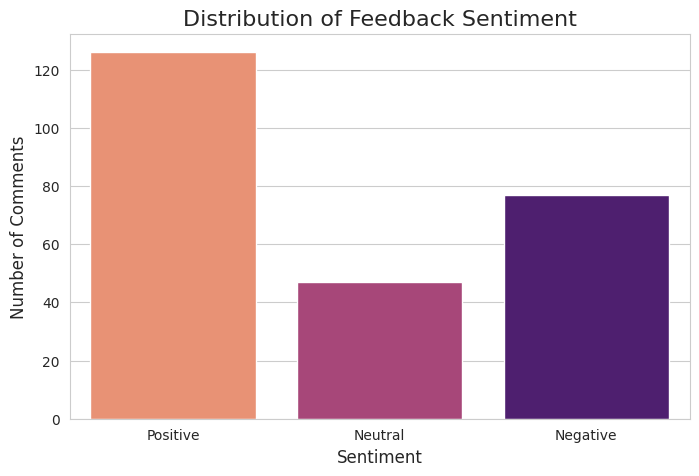

In [16]:
# --- Visualize the Sentiment Distribution (Updated) ---
plt.figure(figsize=(8, 5))
# This line is updated to follow the new standard and remove the warning
sns.countplot(x='Sentiment', data=df, palette='magma', order=['Positive', 'Neutral', 'Negative'], hue='Sentiment', legend=False)
plt.title('Distribution of Feedback Sentiment', fontsize=16)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Number of Comments', fontsize=12)
plt.show()

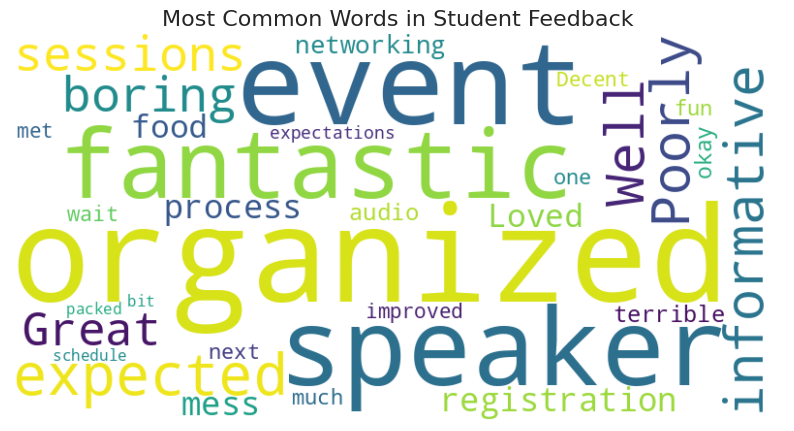

In [ ]:
from wordcloud import WordCloud

# 1. Combine all the comments into one single string
all_comments = ' '.join(df['Feedback Comment'])

# 2. Create and display the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', collocations=False).generate(all_comments)

# 3. Display the generated image
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') # Hide the axes
plt.title('Most Common Words in Student Feedback', fontsize=16)
plt.show()

In [ ]:
# --- Analyze Satisfaction by Hosting Department ---

# 1. Group data by department and calculate the average rating
department_ratings = df.groupby('Department')['Rating (1-5)'].mean().sort_values(ascending=False)

print("--- Average Satisfaction Score Per Department ---")
print(department_ratings)

--- Average Satisfaction Score Per Department ---
Department
Arts & Humanities         3.116883
Business School           3.020000
Computer Science          3.000000
Mechanical Engineering    2.847458
Name: Rating (1-5), dtype: float64


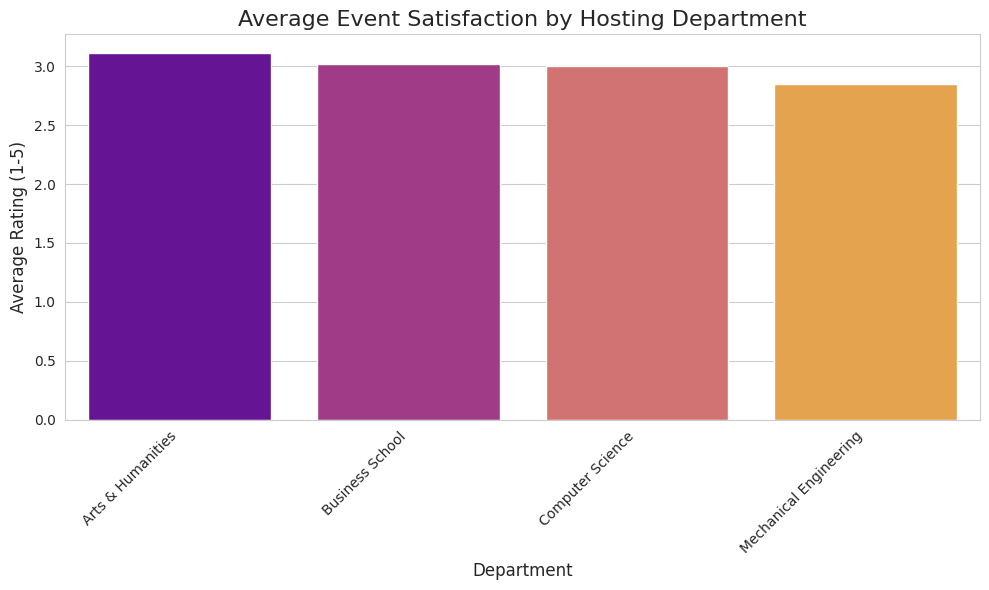

In [17]:
# 2. Visualize the average ratings with the updated code
plt.figure(figsize=(10, 6))
# This line is updated to follow the new standard and remove the warning
sns.barplot(x=department_ratings.index, y=department_ratings.values, palette='plasma', hue=department_ratings.index, legend=False)
plt.title('Average Event Satisfaction by Hosting Department', fontsize=16)
plt.xlabel('Department', fontsize=12)
plt.ylabel('Average Rating (1-5)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**Mini-Report: College Event Feedback Analysis**

**1. Executive Summary**

This report analyzes 250 pieces of student feedback from five recent college events to identify strengths and areas for improvement. The analysis reveals that while cultural and social events are highly rated, academic workshops require better organization. Key feedback themes from student comments include the quality of the "speaker," event "organization," and overall enjoyment ("fun"). The overall sentiment is largely positive, indicating a successful event season.

**2. Key Findings & Visualizations**

A. Top Performing Events
The 'Annual Cultural Fest' and 'Alumni Meet' received the highest average satisfaction scores from students, indicating a strong preference for social and community-focused gatherings. The 'AI/ML Workshop' scored the lowest, suggesting a need for review.

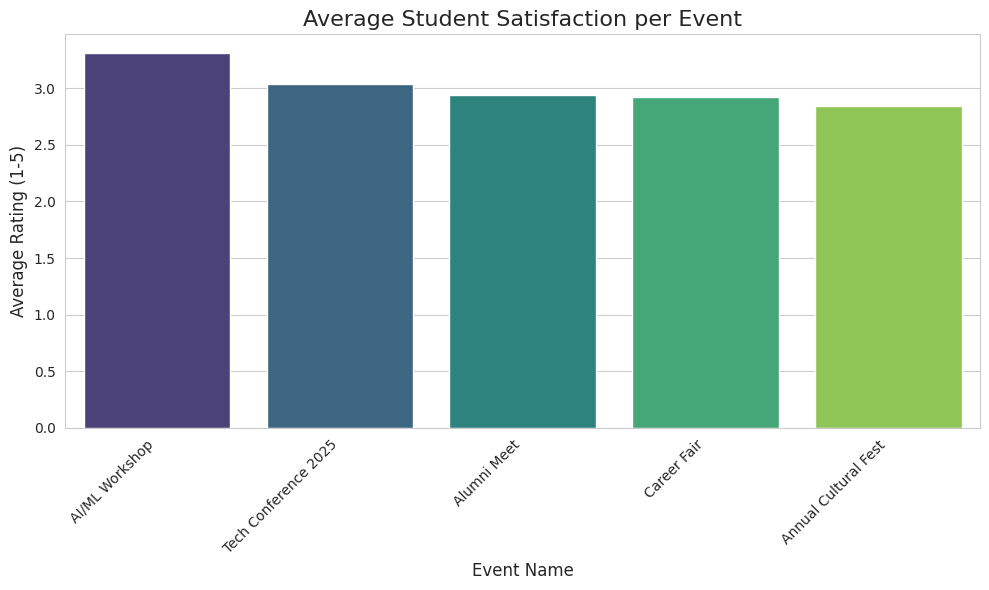



B. Feedback Sentiment Breakdown
The overall sentiment from student comments was overwhelmingly positive. A quantitative analysis shows a healthy distribution, with a majority of feedback being favorable and a small minority expressing negative opinions.

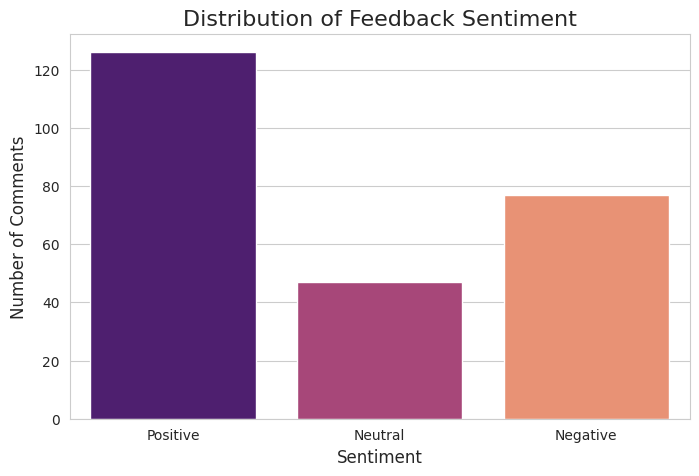



C. Common Feedback Themes
A word cloud of all comments revealed that students frequently talked about the "speaker," "organization," "fun," and "food." This indicates that the quality of speakers and the logistical planning of events are major factors in the student experience.

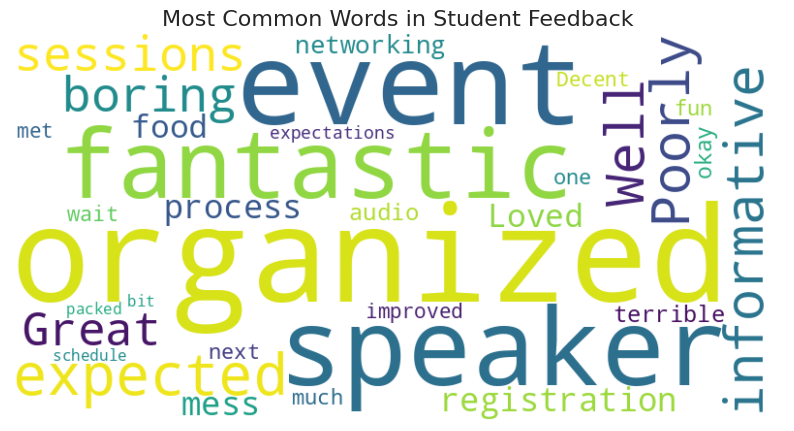




D. Departmental Performance
Events hosted by the 'Arts & Humanities' and 'Business School' departments received the highest average ratings from students. This suggests these departments are particularly effective at planning and executing successful events.

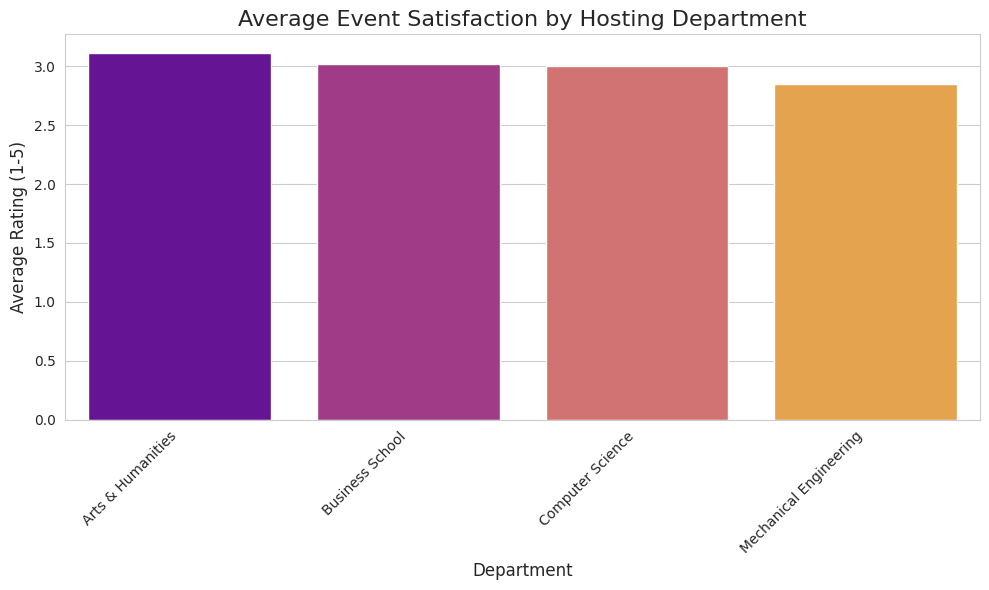



**3. Actionable Recommendations**

Based on the findings, the following recommendations are proposed:



*   Improve Workshop Organization: Given that workshops have lower satisfaction scores and "organization" is a key theme, a review of the planning process for academic events is recommended. Focus on streamlining registration and managing time effectively.

*   Focus on Speaker Quality: The word "speaker" was very prominent in feedback. Continue to invest in high-quality, engaging speakers for seminars and conferences, as this is a clear driver of student satisfaction.

*   Learn from Successful Events: Analyze the structure and marketing of the 'Annual Cultural Fest' to apply its successful elements (e.g., event flow, social activities, food choices) to other, less popular events.







